# PRINCIPAL COMPONENT ANALYSIS

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace=True)  # df = df.dropna(inplace=True) değil!!! Çünkü geçici olarak değiştiriyor
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df = StandardScaler().fit_transform(df)

In [18]:
df[:5, :5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [21]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=3)
pca_=pca.fit_transform(df)

In [53]:
bilesen_df = pd.DataFrame(data=pca_, columns=["Birinci_Bilesen", "Ikinci_Biilesen", "Ucuncu_Biilesen"])

In [54]:
bilesen_df

,Birinci_Bilesen,Ikinci_Biilesen,Ucuncu_Biilesen
0,0.076848,1.653525,0.088228
1,0.337127,-2.320560,-0.694571
2,3.408362,0.755757,-0.969937
3,-2.642221,-0.361486,-1.311980
4,1.071681,-1.511674,3.558376
...,...,...,...
258,-0.152111,-0.331665,-0.751803
259,3.241373,-0.391942,3.013168
260,-1.206322,-0.625714,0.252150
261,2.084856,-2.059851,-0.166405


In [55]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

In [56]:
pca.explained_variance_ratio_.sum()

0.7966194743589904

In [57]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611],
       [ 0.07326172,  0.05232804, -0.33586858, -0.06110473, -0.16508496,
        -0.06431259,  0.09957677,  0.12869693,  0.12496632, -0.11486586,
         0.09064286,  0.01757434,  0.05821636, -0.15423299,  0.65331588,
         0.57049142, -0.02627994]])

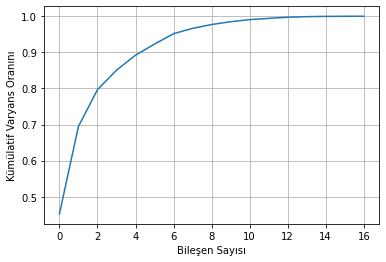

In [58]:
# OPTİMUM BİLEŞEN SAYISI
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranını")
plt.grid(); # kümülatif toplam -->"np.cumsum()"